# Lab 1: Data research and visualization using Python

### **Purpose** : get basic skills using Python for research and data visualization.

### Tasks:

1. Download ***russia_losses_equipment.csv*** file from the site Kaggle.com  
   **link:** https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war  
2. **Choose one option for this lab work, using the formula**  
   N = ord("LLL") % 3 + 1,  
   where N is the option number, LLL is the first letter of your name.
3. Tips:
   -  use csv.reader () function for reading a csv file;
   -  skip the first row (with column headers);
   -  do not use loops or other iterative constructs for processing numpy arrays. Use only slices and/or universal (vectorized) functions;
   -  create functions for tasks 3-7 of each option.
4. Schedule requirements:
   - set the line type (dashed, dashed, etc.);
   - schedules must be signed;
   - add a legend;
   - add a grid and specify the color and type of lines;
   - add the chart name, axis labels, and Axis values;
   - change the size of the graph (for example, 8x16 inches) and the distribution area 
resolution (for example, 100 dpi);
   - save the graph to a png file.

In [2]:
N = ord("V") % 3 + 1
print(f"Zharyi Vadym. Variant: {N}")

Zharyi Vadym. Variant: 3


#### **Option 3.** Investigation of losses of armored personnel carriers (APC).
1. Create a function that accepts the file name and column name as parameter and returns a numpy array with column values.
2. Using the function from the previous task, create an array numpy from the values of the "APC" (Armored personnel carrier) column.
3. Find the daily cost of an APC.
4. Find the 5 largest daily expenses of an APC.
5. Determine how many APC were destroyed in the summer of 2023.
6. Find the average value of destroyed APC for 100-500 days of war.
7. Create a graph of APC losses for the last 200 days (starting from the last one 
dates in the dataset)

In [48]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Function for loading column values from a CSV file
def load_column_from_csv(filename, column_name):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader)
        col_index = headers.index(column_name)
        column_data = []
        for row in reader:
            if col_index == headers.index('date'):
                column_data.append(row[col_index])
            else:
                column_data.append(int(row[col_index]))
        return np.array(column_data)

In [51]:
# Creating a numpy array from the"APC" column
filename = 'russia_losses_equipment.csv'
column_name = 'APC'
btr_losses = load_column_from_csv(filename, column_name)
print(btr_losses)

[17222 17170 17132 17093 17080 17077 17071 17063 17043 17003 16955 16938
 16925 16906 16897 16878 16878 16869 16848 16821 16786 16760 16736 16722
 16699 16681 16667 16648 16631 16620 16599 16567 16542 16521 16495 16480
 16473 16461 16426 16402 16385 16368 16363 16350 16341 16332 16323 16294
 16286 16255 16238 16211 16203 16161 16141 16103 16095 16074 16050 16039
 16013 16000 15980 15963 15917 15902 15883 15871 15862 15826 15811 15779
 15755 15732 15715 15704 15685 15645 15629 15611 15600 15583 15566 15550
 15524 15505 15480 15459 15450 15431 15413 15398 15383 15372 15337 15319
 15307 15287 15269 15263 15234 15208 15187 15176 15144 15131 15105 15096
 15076 15036 15020 15002 14980 14947 14935 14913 14891 14858 14818 14803
 14786 14775 14748 14721 14699 14665 14630 14595 14552 14538 14508 14460
 14417 14375 14353 14313 14281 14246 14227 14213 14179 14156 14129 14096
 14067 14046 14007 13991 13971 13957 13942 13928 13916 13904 13896 13873
 13852 13835 13827 13809 13796 13765 13745 13698 13

In [52]:
# Function for finding daily losses of APC
def calculate_daily_losses(btr_losses):
    return btr_losses[:-1] - btr_losses[1:]

In [53]:
daily_losses = calculate_daily_losses(btr_losses)
print(daily_losses)

[ 52  38  39  13   3   6   8  20  40  48  17  13  19   9  19   0   9  21
  27  35  26  24  14  23  18  14  19  17  11  21  32  25  21  26  15   7
  12  35  24  17  17   5  13   9   9   9  29   8  31  17  27   8  42  20
  38   8  21  24  11  26  13  20  17  46  15  19  12   9  36  15  32  24
  23  17  11  19  40  16  18  11  17  17  16  26  19  25  21   9  19  18
  15  15  11  35  18  12  20  18   6  29  26  21  11  32  13  26   9  20
  40  16  18  22  33  12  22  22  33  40  15  17  11  27  27  22  34  35
  35  43  14  30  48  43  42  22  40  32  35  19  14  34  23  27  33  29
  21  39  16  20  14  15  14  12  12   8  23  21  17   8  18  13  31  20
  47  19  12  47  45  24  54  38  73  18  18  29  17  20  20  27  21   9
  24  25  28  19  37  16   9  35  17  24  24  11  17  20  27  24  27  25
  19  51  40  28  21  28  29  30  44  14  16  37  16  15  37  35  70  36
  34  53  16  39  47  39  27  21  14  21  22  20  22  35   4  13  13  19
  16  32  29  25  19  15  16  42  31  59  23  11  1

In [54]:
# Find the 5 largest daily losses
def five_largest_losses(daily_losses):
    return np.sort(daily_losses)[-5:][::-1]

In [55]:
top_losses = five_largest_losses(daily_losses)
print(top_losses)

[190 120 110  96  91]


In [56]:
# Function for finding APC between dates
def apc_for_summer(filename, start_date, end_date):
    date_values = load_column_from_csv(filename, 'date')

    date_range = (date_values >= start_date) & (date_values <= end_date)
    filtered_apc = btr_losses[date_range]

    return filtered_apc

In [57]:
# How many APC were destroyed in the summer of 2023
start_date = '2023-06-01'
end_date = '2023-09-01'
btr_date_range = apc_for_summer(filename, start_date, end_date)
btr_losses_date_range = np.sum(calculate_daily_losses(btr_date_range))
print(btr_losses_date_range)

1135


In [58]:
# Average value of destroyed APC in 100 days
start_date = '2022-06-03'
end_date = '2023-07-09'
btr_date_range = apc_for_summer(filename, start_date, end_date)
btr_losses_date_range = np.mean(calculate_daily_losses(btr_date_range))
print(btr_losses_date_range)

11.46633416458853


In [59]:
def plot_apc_losses(filename):
    start_date = '2024-03-06'
    end_date = '2024-09-22'
    btr_date_range = apc_for_summer(filename, start_date, end_date)
    btr_losses_date_range = calculate_daily_losses(btr_date_range)

    dates = np.arange(np.datetime64(start_date), np.datetime64(end_date))
    
    plt.figure(figsize=(16, 16), dpi=100)
    plt.plot(dates, btr_losses_date_range, linestyle='--', color='blue', label='APC losses')
    
    plt.title('APC losses in the last 200 days', fontsize=30)
    plt.xlabel('Date', fontsize=17)
    plt.ylabel('APC losses', fontsize=17)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    
    plt.savefig('btr_losses_summer_2023.png')
    
    plt.show()

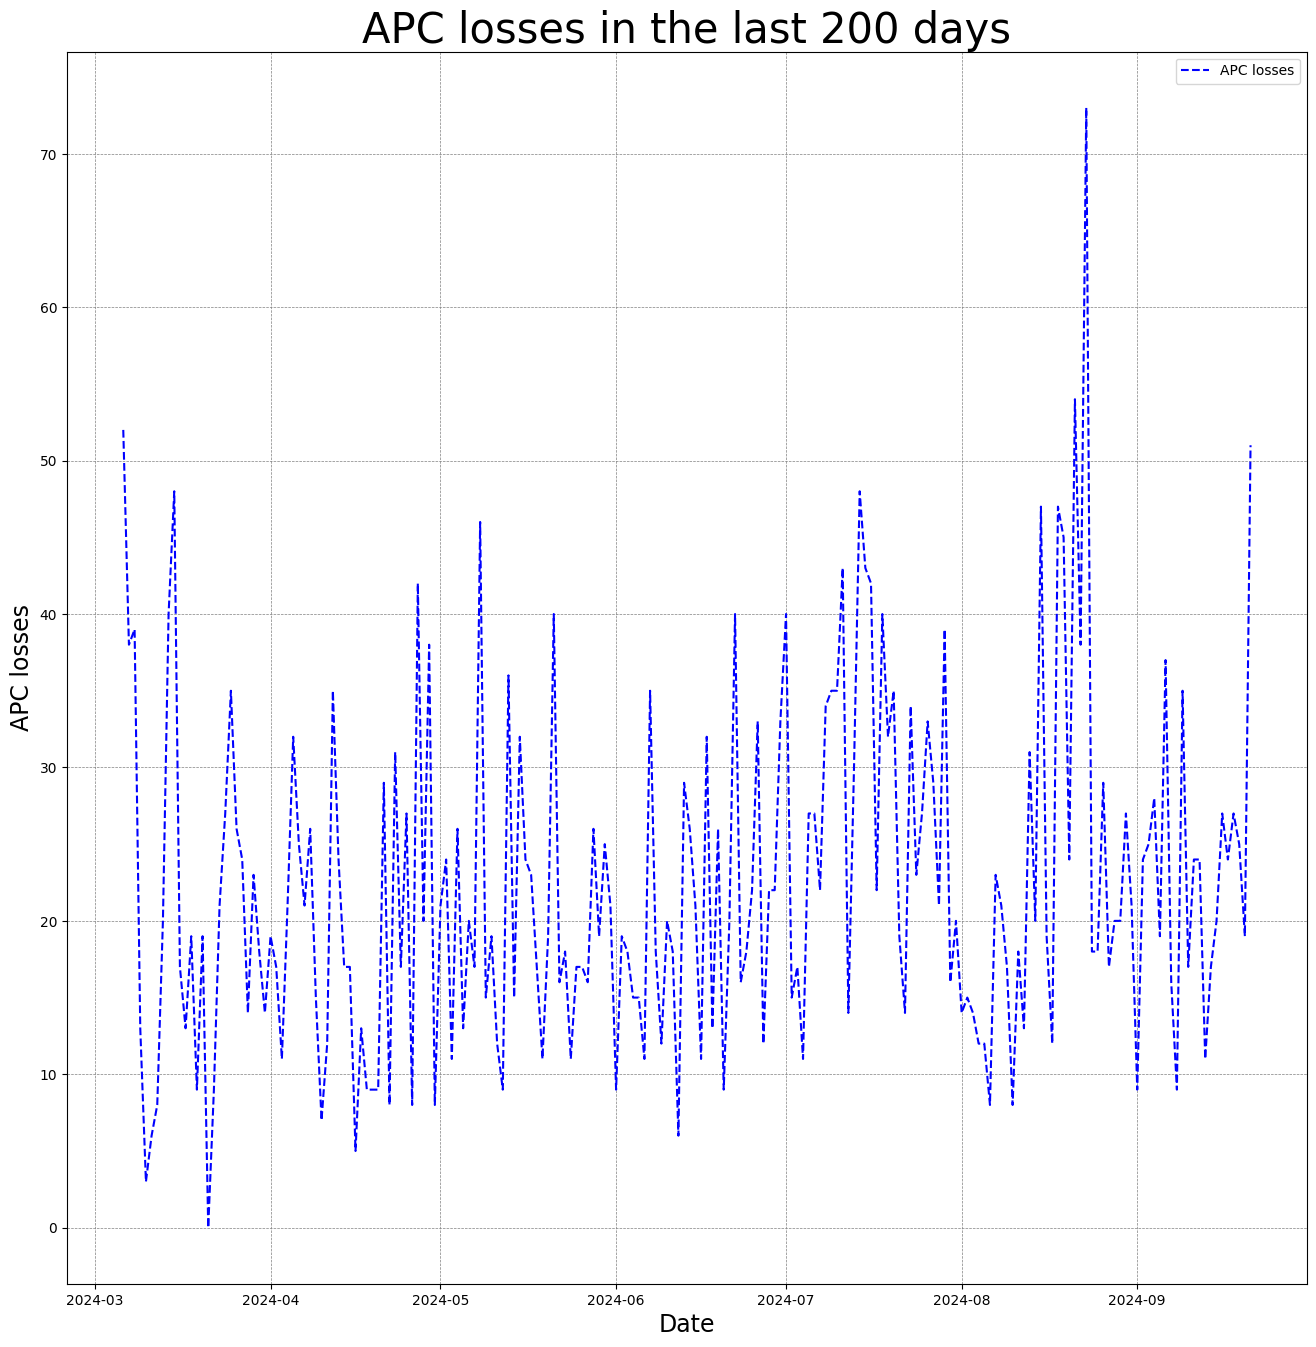

In [60]:
plot_apc_losses(filename)